### Hierarchical Clustering - Demographics

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
!ls *.pkl

AgeSexRace.pkl	econ.pkl


In [3]:
demog = pd.read_pickle('AgeSexRace.pkl')
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 33 columns):
FIPS             570 non-null object
city_town        570 non-null object
p_malepop        570 non-null float64
p_ageless5       570 non-null float64
p_age5to9        570 non-null float64
p_age10to14      570 non-null float64
p_age15to19      570 non-null float64
p_age20to24      570 non-null float64
p_age25to34      570 non-null float64
p_age35to44      570 non-null float64
p_age45to54      570 non-null float64
p_age55to59      570 non-null float64
p_age60to64      570 non-null float64
p_age65to74      570 non-null float64
p_age75to84      570 non-null float64
p_ageover85      570 non-null float64
p_white          570 non-null float64
p_black          570 non-null float64
p_amind          570 non-null float64
p_asian          570 non-null float64
p_asian_ind      570 non-null float64
p_as_chin        570 non-null float64
p_as_filip       570 non-null float64
p_as_jap         570 no

In [4]:
s =pd.DataFrame([x.split(sep=',') for x in demog['city_town']])
s.columns = ['town','county','state']
s.info()
#s[161:166]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 3 columns):
town      570 non-null object
county    570 non-null object
state     570 non-null object
dtypes: object(3)
memory usage: 13.4+ KB


In [13]:
X = demog.loc[:,'p_black':'p_other_lat']
X=X.set_index(s['town'])
X.ix[520]

p_black          2.2
p_amind          0.0
p_asian          2.7
p_asian_ind      0.8
p_as_chin        0.7
p_as_filip       0.5
p_as_jap         0.0
p_as_korean      0.1
p_as_viet        0.2
p_as_other       0.4
p_2_races        1.9
p_latino         5.1
p_mexican        0.9
p_puerto_rico    1.2
p_cuban          0.2
p_other_lat      2.8
Name: Sparta township, dtype: float64

In [33]:
X = X[X['p_latino'] != 0]
X.info()
X.index.values

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, Absecon city to White township
Data columns (total 16 columns):
p_black          558 non-null float64
p_amind          558 non-null float64
p_asian          558 non-null float64
p_asian_ind      558 non-null float64
p_as_chin        558 non-null float64
p_as_filip       558 non-null float64
p_as_jap         558 non-null float64
p_as_korean      558 non-null float64
p_as_viet        558 non-null float64
p_as_other       558 non-null float64
p_2_races        558 non-null float64
p_latino         558 non-null float64
p_mexican        558 non-null float64
p_puerto_rico    558 non-null float64
p_cuban          558 non-null float64
p_other_lat      558 non-null float64
dtypes: float64(16)
memory usage: 74.1+ KB


array(['Absecon city', 'Atlantic City city', 'Brigantine city',
       'Buena borough', 'Buena Vista township', 'Corbin City city',
       'Egg Harbor township', 'Egg Harbor City city', 'Estell Manor city',
       'Folsom borough', 'Galloway township', 'Hamilton township',
       'Hammonton town', 'Linwood city', 'Margate City city',
       'Mullica township', 'Northfield city', 'Pleasantville city',
       'Port Republic city', 'Somers Point city', 'Ventnor City city',
       'Weymouth township', 'Allendale borough', 'Alpine borough',
       'Bergenfield borough', 'Bogota borough', 'Carlstadt borough',
       'Cliffside Park borough', 'Closter borough', 'Cresskill borough',
       'Demarest borough', 'Dumont borough', 'East Rutherford borough',
       'Edgewater borough', 'Elmwood Park borough', 'Emerson borough',
       'Englewood city', 'Englewood Cliffs borough', 'Fair Lawn borough',
       'Fairview borough', 'Fort Lee borough', 'Franklin Lakes borough',
       'Garfield city', 'G

In [15]:
X_scaled = preprocessing.scale(X)

X_scaled[520:521,:]    

array([[-0.57592, -0.41488, -0.72174, -0.55306, -0.66558, -0.48651,
        -0.09542, -0.31205, -0.29515, -0.63016, -0.81936,  0.44153,
        -0.2269 ,  0.8725 , -0.54232,  0.48131]])

In [16]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for m in methods:
    Z = linkage(X_scaled, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print(m,": ", c)

#    c, coph_dists = cophenet(Z, pdist(X))
#c
#coph_dists
#c

single :  0.64249113881
complete :  0.721169491328
average :  0.704192671365
weighted :  0.512044528399
centroid :  0.68925158773
median :  0.59671329384
ward :  0.515899860117


In [17]:
Z = linkage(X_scaled, 'ward')

In [18]:
Z[:10]

array([[ 172.     ,  411.     ,    0.08686,    2.     ],
       [ 133.     ,  223.     ,    0.2267 ,    2.     ],
       [ 112.     ,  174.     ,    0.23204,    2.     ],
       [ 177.     ,  558.     ,    0.25177,    3.     ],
       [ 326.     ,  345.     ,    0.29131,    2.     ],
       [ 359.     ,  421.     ,    0.30336,    2.     ],
       [ 132.     ,  169.     ,    0.30407,    2.     ],
       [ 130.     ,  430.     ,    0.32116,    2.     ],
       [ 124.     ,  144.     ,    0.32215,    2.     ],
       [ 321.     ,  437.     ,    0.34738,    2.     ]])

In [19]:
Z[-10:]

array([[ 1082.     ,  1090.     ,    21.434  ,    14.     ],
       [ 1092.     ,  1104.     ,    23.53711,   104.     ],
       [ 1093.     ,  1106.     ,    24.95394,   115.     ],
       [ 1101.     ,  1105.     ,    25.42985,    56.     ],
       [  166.     ,  1108.     ,    25.75926,    57.     ],
       [ 1097.     ,  1102.     ,    26.05628,   372.     ],
       [ 1022.     ,  1109.     ,    26.89897,    61.     ],
       [ 1103.     ,  1107.     ,    34.81498,   125.     ],
       [ 1111.     ,  1112.     ,    43.04516,   186.     ],
       [ 1110.     ,  1113.     ,    47.78472,   558.     ]])

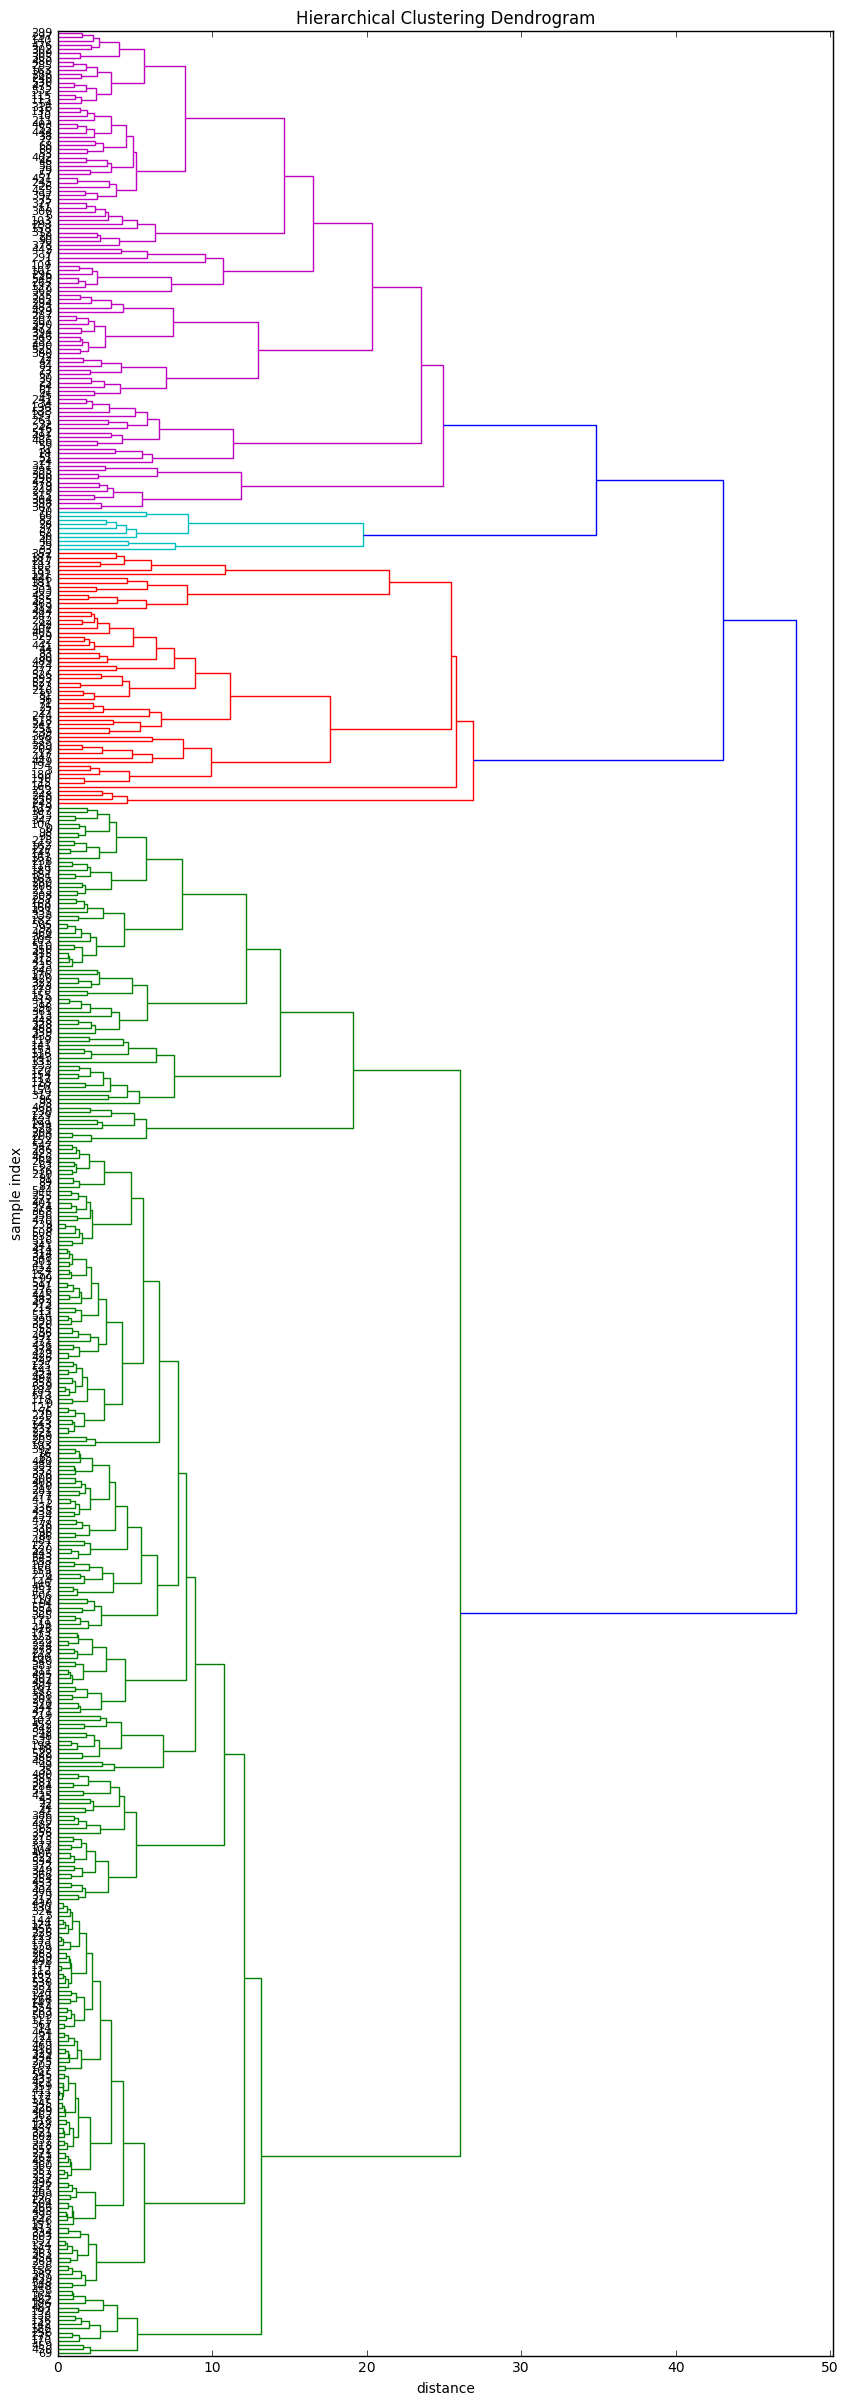

In [20]:
# calculate full dendrogram
plt.figure(figsize=(10, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
#    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [21]:
Z[-10:,2]

array([ 21.434  ,  23.53711,  24.95394,  25.42985,  25.75926,  26.05628,
        26.89897,  34.81498,  43.04516,  47.78472])

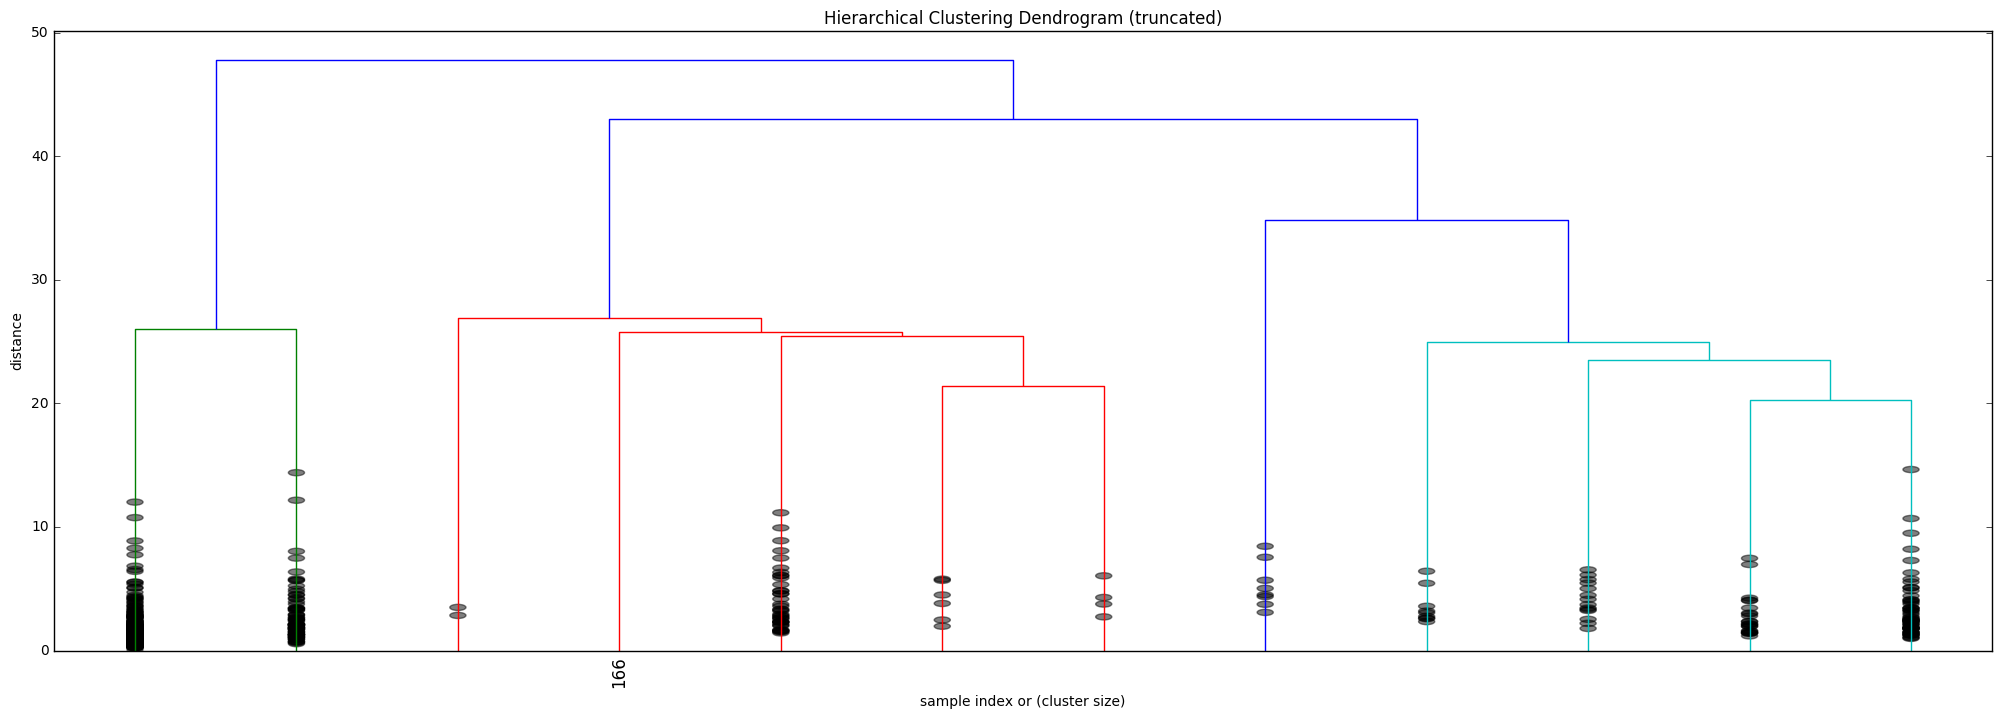

In [22]:
plt.figure(figsize=(25, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [23]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

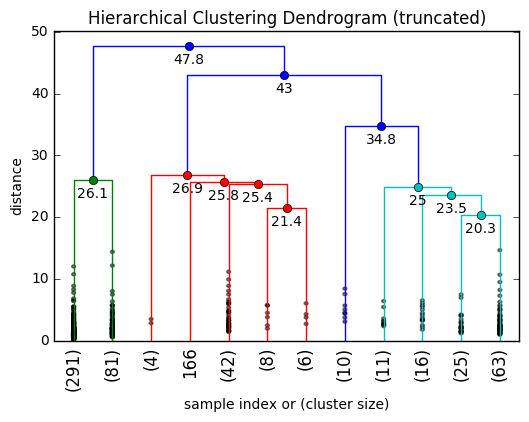

In [24]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

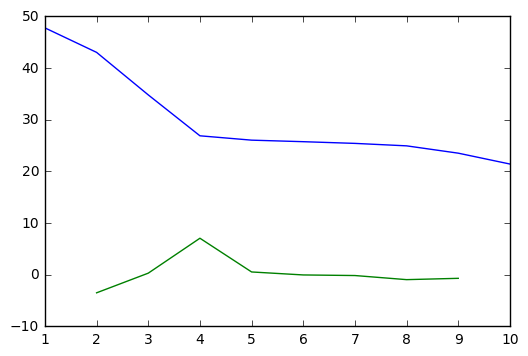

clusters: 4


In [25]:
## Elbow Method

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [27]:
from scipy.cluster.hierarchy import fcluster
max_d = 30
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 4, 1, 2, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 2, 1, 2, 4, 1, 4, 1, 1,
       4, 4, 2, 4, 2, 3, 3, 4, 4, 4, 3, 4, 1, 2, 3, 4, 2, 3, 1, 2, 1, 2, 4,
       4, 4, 1, 1, 3, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 1, 4, 1, 3, 4, 4,
       1, 3, 2, 4, 4, 1, 4, 1, 4, 1, 4, 2, 2, 3, 2, 4, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4,
       1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       4, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 2, 1, 1, 4, 1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4,

In [41]:
z = zip(clusters,X.index.values)
sorted(list(z))
#    print(i)

[(1, 'Absecon city'),
 (1, 'Alexandria township'),
 (1, 'Allamuchy township'),
 (1, 'Allendale borough'),
 (1, 'Allenhurst borough'),
 (1, 'Allentown borough'),
 (1, 'Alloway township'),
 (1, 'Alpha borough'),
 (1, 'Andover borough'),
 (1, 'Andover township'),
 (1, 'Atlantic Highlands borough'),
 (1, 'Audubon Park borough'),
 (1, 'Audubon borough'),
 (1, 'Avalon borough'),
 (1, 'Avon-by-the-Sea borough'),
 (1, 'Barnegat Light borough'),
 (1, 'Barnegat township'),
 (1, 'Barrington borough'),
 (1, 'Bass River township'),
 (1, 'Bay Head borough'),
 (1, 'Beach Haven borough'),
 (1, 'Beachwood borough'),
 (1, 'Bedminster township'),
 (1, 'Belmar borough'),
 (1, 'Belvidere town'),
 (1, 'Berkeley Heights township'),
 (1, 'Berkeley township'),
 (1, 'Berlin borough'),
 (1, 'Bernardsville borough'),
 (1, 'Bethlehem township'),
 (1, 'Beverly city'),
 (1, 'Blairstown township'),
 (1, 'Bloomingdale borough'),
 (1, 'Bloomsbury borough'),
 (1, 'Boonton township'),
 (1, 'Bordentown city'),
 (1, 'Borde

In [ ]:
from collections import defaultdict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters):
    cluster_dict[c].append(i)
print(cluster_dict)